# San Francisco Restaurant Project

## Inspection Scores

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
raw_score_data = pd.read_csv('Restaurant_Scores_-_LIVES_Standard.csv')

In [84]:
raw_score_data.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category
0,1922,All stars Donuts,901 Clement St,San Francisco,CA,94118,37.782694,-122.468969,"(37.782694, -122.468969)",NaN,1922_20160225,02/25/2016 12:00:00 AM,86.0,Routine - Unscheduled,1922_20160225_103154,Unclean or degraded floors walls or ceilings,Low Risk
1,67448,Soo Fong Restaurant,3801 03rd St 370,San Francisco,CA,94124,37.741829,-122.388098,"(37.741829, -122.388098)",NaN,67448_20180507,05/07/2018 12:00:00 AM,92.0,Routine - Unscheduled,67448_20180507_103149,Wiping cloths not clean or properly stored or ...,Low Risk
2,1757,Dar Bar Pakistani/Indian Cusine,1412 Polk St,San Francisco,CA,94109,37.789784,-122.420455,"(37.789784, -122.420455)",NaN,1757_20170928,09/28/2017 12:00:00 AM,86.0,Routine - Unscheduled,1757_20170928_103131,Moderate risk vermin infestation,Moderate Risk
3,93022,Wise Sons Delicatessen,537 Octavia St,San Francisco,CA,94102,NaN,NaN,NaN,NaN,93022_20180907,09/07/2018 12:00:00 AM,92.0,Routine - Unscheduled,93022_20180907_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk
4,4864,DRAGON CITY BAKERY & CAFE,2367 MISSION St,San Francisco,CA,94110,37.759174,-122.419066,"(37.759174, -122.419066)",1.415583e+10,4864_20161206,12/06/2016 12:00:00 AM,84.0,Routine - Unscheduled,4864_20161206_103157,Food safety certificate or food handler card n...,Low Risk


## Data Cleaning

In [85]:
#replace 0 lat and long with np.nan
raw_score_data['business_latitude'] = raw_score_data['business_latitude'].replace(0, np.NaN)
raw_score_data['business_longitude'] = raw_score_data['business_longitude'].replace(0, np.NaN)

#drop NaN values in the colums we require 
clean_data = raw_score_data.dropna(axis=0, subset=['business_latitude', 'business_longitude', 'business_name', 'inspection_score'])
#drop unneccesary columns
clean_data = clean_data.drop(['inspection_id', 'violation_id', 'business_phone_number', 'inspection_type', 'business_location', 'violation_description'], axis = 1)
#convert inspection date to datetime object
clean_data['inspection_date'] = pd.to_datetime(clean_data['inspection_date'])
#sort the data by date and keep only the most recent inspection instance for each business
clean_data = clean_data.sort_values('inspection_date')
clean_data = clean_data.drop_duplicates('business_id', keep = 'last')
clean_data.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,inspection_date,inspection_score,risk_category
27309,7119,LO-COST MEAT MARKET #2,2918 24th St,San Francisco,CA,94110,37.752768,-122.410472,2016-02-17,77.0,Low Risk
8967,64319,Littlegreencyclo LLC,Off The Grid-Upper Haight,San Francisco,CA,NaN,37.777122,-122.419639,2016-02-19,100.0,NaN
26003,4372,CLUB PUERTORRIQUENO OF SF INC.,3249A MISSION St,San Francisco,CA,94110,37.744901,-122.420273,2016-02-26,100.0,NaN
23218,67606,Mayo & Mustard,75 Hawthorne,San Francisco,CA,94105,37.785144,-122.398383,2016-02-26,96.0,Low Risk
40620,5291,EL TONAYENSE CATERING TRUCK #2,3101 19th St,San Francisco,CA,94110,37.760583,-122.413239,2016-02-29,90.0,Low Risk


In [103]:
dropwords = ['mollie stone', 'chevron', 'shell' 'marriott', 'hilton', 'school', 'hotel', "church","cathedral","convention center", "mosque",
            "islamic","synagogue","jewish","museum","academy","temple","safeway","target","whole foods","gas","trader joe's",
            "market", "pharmacy", "cvs", "drug","hotel","marriot","westin","ritz", "steamer"]

In [104]:
for word in dropwords: 
    droplist = list(clean_data[clean_data['business_name'].str.contains(word, case=False)].index)
    for i in droplist:
        clean_data = clean_data.drop(i)

## Initial Exploratory Data Analysis

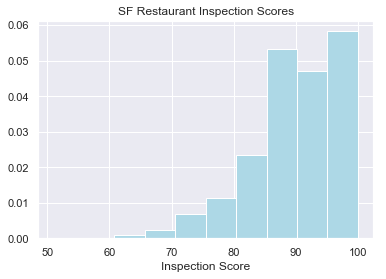

In [88]:
sns.set()
plt.hist(clean_data['inspection_score'], density=True, color ='lightblue' )
plt.title('SF Restaurant Inspection Scores')
plt.xlabel('Inspection Score')
plt.show()

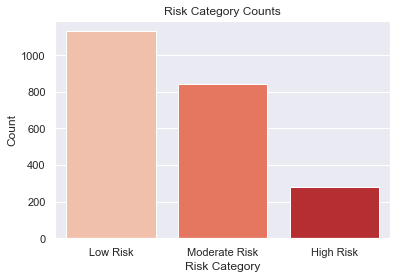

In [89]:
sns.countplot(clean_data['risk_category'], palette="Reds")
plt.xlabel("Risk Category")
plt.ylabel("Count")
plt.title("Risk Category Counts")
plt.show()

In [90]:
import json
with open('keys.json') as file:
    keys = json.load(file)
GOOGLE_KEY = keys.get('google')
YELP_KEY = keys.get('yelp')

In [91]:
from bokeh.io import output_file, show, output_notebook
from bokeh.models import ColumnDataSource, GMapOptions
from bokeh.plotting import gmap
from bokeh.transform import linear_cmap
from bokeh.palettes import Reds, Blues, Greens

In [92]:
low_scores = clean_data.loc[clean_data['inspection_score'] < 86]
mid_scores = clean_data.loc[(clean_data['inspection_score'] >= 86) & (clean_data['inspection_score'] <=92)]
high_scores = clean_data.loc[clean_data['inspection_score'] > 92]

In [93]:
output_notebook()
map_options = GMapOptions(lat=37.7749, lng=-122.4194, map_type="roadmap", zoom=11)

p = gmap(GOOGLE_KEY, map_options, title="San Francisco Restaurant Health Inspection Scores")

low_mapper = linear_cmap(field_name = 'inspection_score', palette=Reds[5], low = 50, high = 86)
mid_mapper = linear_cmap(field_name = 'inspection_score', palette=Blues[4], low = 92, high = 86)
high_mapper = linear_cmap(field_name = 'inspection_score', palette=Greens[4], low = 100, high = 92)


low = ColumnDataSource(low_scores)
mid = ColumnDataSource(mid_scores)
high = ColumnDataSource(high_scores)

p.circle(x='business_longitude', y='business_latitude', size=3, color=low_mapper, 
         fill_alpha=0.7, source=low, legend = "Low Scores")
p.circle(x='business_longitude', y='business_latitude', size=3, color=mid_mapper, 
         fill_alpha=0.7, source=mid, legend = "Mid Scores")
p.circle(x='business_longitude', y='business_latitude', size=3, color=high_mapper, 
         fill_alpha=0.7, source=high, legend = "High Scores")

p.legend.location = "top_left"
p.legend.click_policy="hide"
show(p)

Loading BokehJS ...

## Yelp Data Retrieval 

In [94]:
import requests #for querying the yelp api

In [95]:
def data_collector(dataframe, index, api_key):
    """Collects Data For a Griven Restaurant From Yelp"""
    #takes data frame and index as input. Outputs Dictionary with yelp information
    #will return 0 if failure
    #json and requests are neccessary

    #datafame col names must be in original formating
    #extract search information form data frame
    name = raw_score_data.iloc[index]['business_name']
    address = raw_score_data.iloc[index]['business_address']
    lat = raw_score_data.iloc[index]['business_latitude']
    long = raw_score_data.iloc[index]['business_longitude']


    url_match = "https://api.yelp.com/v3/businesses/matches"
    url_business = "https://api.yelp.com/v3/businesses/"

    #parameters to send api are fed int the querystring
    querystring = {"name":name,"city":"San%20Francisco","state":"CA","country":"US","address1":address,"latitude": lat,"longitude":long}
    payload = ""

    #API authorization is sent through the header
    headers = {
    'Authorization': "Bearer " + api_key,
    'cache-control': "no-cache",
    }

    #query yelp API using requests
    match_response = requests.request("GET", url_match, data=payload, headers=headers, params=querystring)
    match_dict = match_response.json()
    if match_response.status_code == 429:
        return 429
    if match_response.status_code != 200:
        return 0
    if len(match_dict['businesses']) == 0:
        return 0

    business_id = match_dict['businesses'][0]['id']

    business_response = requests.request("GET", url_business + business_id, data=payload, headers=headers)

    if business_response.status_code != 200:
        return 0

    info = business_response.json()

    #return business information from yelp
    return info

In [105]:
yelp_data = clean_data
yelp_data['rating'] = np.NaN
yelp_data['price'] = np.NaN
yelp_data['review_count'] = np.NaN
yelp_data['open'] = np.NaN
yelp_data['close'] = np.NaN
yelp_data = yelp_data.reset_index()
yelp_data = yelp_data.drop('index', axis=1)
yelp_data.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,inspection_date,inspection_score,risk_category,rating,price,review_count,open,close
0,64319,Littlegreencyclo LLC,Off The Grid-Upper Haight,San Francisco,CA,NaN,37.777122,-122.419639,2016-02-19,100.0,NaN,NaN,NaN,NaN,NaN,NaN
1,4372,CLUB PUERTORRIQUENO OF SF INC.,3249A MISSION St,San Francisco,CA,94110,37.744901,-122.420273,2016-02-26,100.0,NaN,NaN,NaN,NaN,NaN,NaN
2,67606,Mayo & Mustard,75 Hawthorne,San Francisco,CA,94105,37.785144,-122.398383,2016-02-26,96.0,Low Risk,NaN,NaN,NaN,NaN,NaN
3,5291,EL TONAYENSE CATERING TRUCK #2,3101 19th St,San Francisco,CA,94110,37.760583,-122.413239,2016-02-29,90.0,Low Risk,NaN,NaN,NaN,NaN,NaN
4,35503,Left Coast Catering and Cafe,2152 03rd St,San Francisco,CA,94107,37.762368,-122.388877,2016-03-11,98.0,Low Risk,NaN,NaN,NaN,NaN,NaN


yelplist = []
for index in yelp_data.index:
    d = data_collector(yelp_data, index, YELP_KEY)
    if d == 429:
        break
    yelplist.append(d)
    

with open('yelpdata', 'w') as fout:
    json.dump(yelplist, fout)

yelp_data = pd.read_csv("mergedyelpdata.csv")

In [97]:
with open('yelpdata') as file:
    yelplist = json.load(file)

In [107]:
yelp_data['categories'] = np.NaN

In [108]:
for index in yelp_data.index:
    if yelplist[index] == 0:
        continue
    else: 
        yelp_data.iloc[index, yelp_data.columns.get_loc('price')] = yelplist[index].get('price')
        yelp_data.iloc[index, yelp_data.columns.get_loc('rating')] = yelplist[index].get('rating')
        yelp_data.iloc[index, yelp_data.columns.get_loc('review_count')] = yelplist[index].get('review_count')
        
        categories = []
        for i in range(len(yelplist[index].get('categories'))):
            categories.extend(list(yelplist[index].get('categories')[i].values()))
        c = " ".join(str(x) for x in categories)    
        yelp_data.iloc[index, yelp_data.columns.get_loc('categories')] = c
        
        try:
            yelp_data.iloc[index, yelp_data.columns.get_loc('open')] = yelplist[index].get('hours')[0].get('open')[0].get('start')
            yelp_data.iloc[index, yelp_data.columns.get_loc('close')] = yelplist[index].get('hours')[0].get('open')[0].get('end')
        except:
            continue

In [110]:
yelp_data.tail()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,inspection_date,inspection_score,risk_category,rating,price,review_count,open,close,categories
2511,10376,Good Frikin Chicken,10 29th St,San Francisco,CA,NaN,37.744369,-122.420967,2019-01-07,85.0,Moderate Risk,4.0,$$$,2446.0,1700,2100,seafood Seafood vietnamese Vietnamese
2512,272,ON THE BRIDGE,1581 Webster St #206,San Francisco,CA,94115,37.785227,-122.431472,2019-01-07,72.0,Low Risk,NaN,NaN,NaN,NaN,NaN,NaN
2513,2234,Kam Lok Restaurant,834 Washington St,San Francisco,CA,94108,37.795118,-122.407083,2019-01-07,72.0,Low Risk,NaN,NaN,NaN,NaN,NaN,NaN
2514,2519,PACIFIC PLAZA CAFE,1340 FRANKLIN St,San Francisco,CA,94109,37.786864,-122.423218,2019-01-08,82.0,Moderate Risk,3.0,$$,48.0,0800,2100,drugstores Drugstores convenience Convenience ...
2515,33527,Popeyes Chicken & Biscuits,1426 Fillmore St Space T,San Francisco,CA,94115,37.782817,-122.432577,2019-01-08,80.0,High Risk,4.0,$$,586.0,1130,1545,sushi Sushi Bars japanese Japanese


In [111]:
yelp_data = yelp_data.dropna(subset=['open', 'close', 'rating'])

In [112]:
yelp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1183 entries, 0 to 2515
Data columns (total 17 columns):
business_id             1183 non-null int64
business_name           1183 non-null object
business_address        1183 non-null object
business_city           1183 non-null object
business_state          1183 non-null object
business_postal_code    1156 non-null object
business_latitude       1183 non-null float64
business_longitude      1183 non-null float64
inspection_date         1183 non-null datetime64[ns]
inspection_score        1183 non-null float64
risk_category           1061 non-null object
rating                  1183 non-null float64
price                   1123 non-null object
review_count            1183 non-null float64
open                    1183 non-null object
close                   1183 non-null object
categories              1183 non-null object
dtypes: datetime64[ns](1), float64(5), int64(1), object(10)
memory usage: 166.4+ KB
